<a href="https://colab.research.google.com/github/sa1manhaidr/TSF-Internship/blob/main/TSF_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  **Spark Foundation Internship**

              TASK # 4 : Prediction using Decision tree 
                Data Science and Business Analytics 
                 Method : Decision Tree Classifier 
                     Author : Salman Haider 

**TASK OBJECTIVE**

Create the Decision Tree classifier and visualize graphically. The purpose is to feed any new data to the classifier, and be able to predict the right class accordingly.


**IMPORTING REQUIRED LIBRARIES**

In [ ]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np
# Visualisation Libraries 
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import Image
!pip install dtreeviz
from dtreeviz.trees import *
from sklearn import tree
# Data import Libraries 
from sklearn.datasets import load_iris

# Model Evaluation 
from sklearn.metrics import  accuracy_score


**READING THE DATA**

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**DATA WRANGLING**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Number of rows 150, and number of columns 5 (4 + target )  ,in the thedataset


In [ ]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.117570,0.871754,0.817941
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126
Petal Length,0.871754,-0.428440,1.000000,0.962865
Petal Width,0.817941,-0.366126,0.962865,1.000000


**DATA VISUALIZATION**

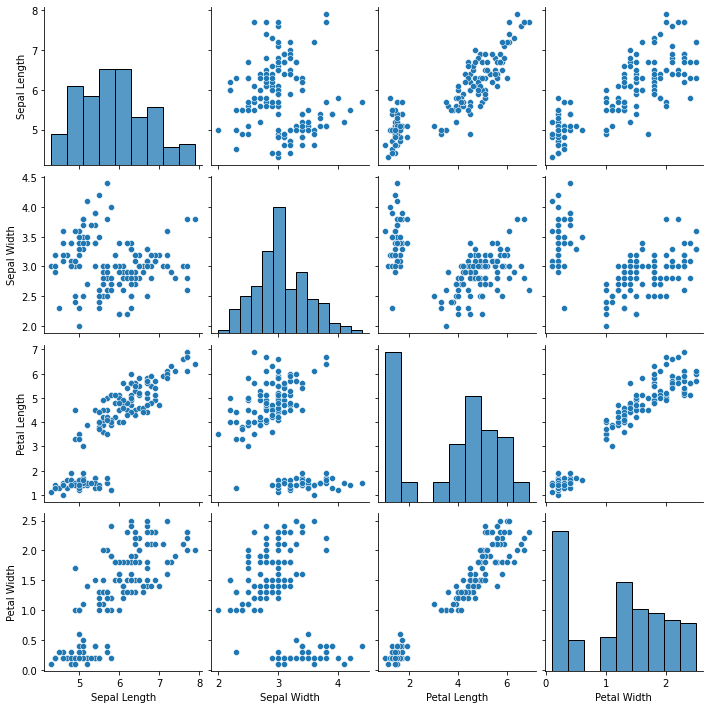

In [ ]:
sns.pairplot(df)
plt.show()


**MULTI-VARIATE PLOT**

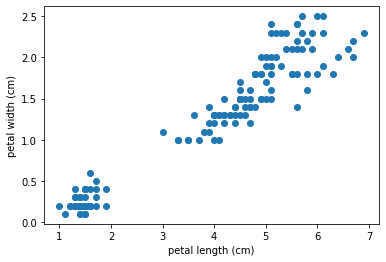

In [ ]:
# scatter plot
scatter = plt.scatter(df["Petal Length"], df["Petal Width"] ) 
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

**Data Preparation**

Our goal is to predict the species. So the depenedent variable will be Species and the feature we have available are	PetalLength,PetalWidth,which will be independent variables.

In [ ]:
X = iris.data[:,-2:] # Independent Variable (Choosing Petal length and Petal Width as feature)
y = iris.target # Dependent Variable 


Breaking our DataSet into Training and Test set to give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)


**Training the Model**

 Decision Trees is the non parametric machine learning algorithm ,uses a branching method (like a tree )  to illustrate every possible output for a specific input.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

**Evaluating The Model**

In [ ]:
y_pred = model.predict(X_test)
print("accuracy:", model.score(X_test ,y_test) )

accuracy: 0.9777777777777777


**MODEL VISUALIZATION**


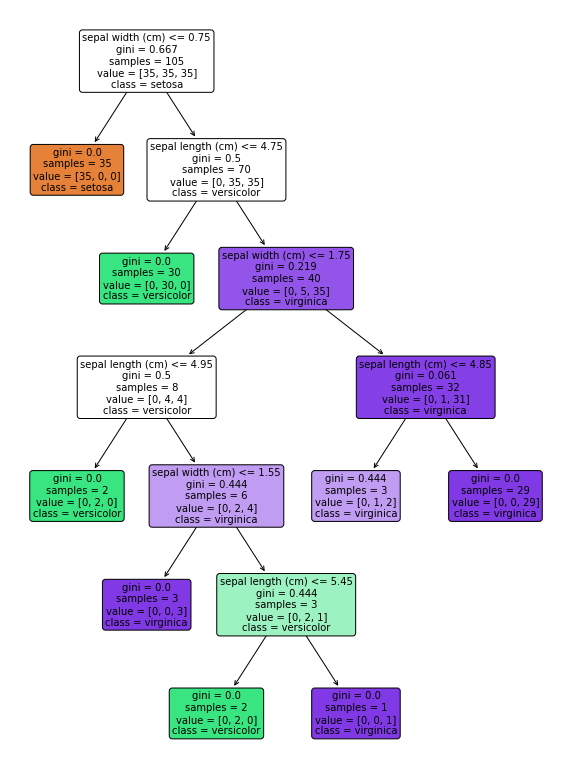

In [ ]:
plt.figure(figsize=(10,14))
tree.plot_tree(model, class_names=iris.target_names, feature_names=iris.feature_names[:], filled=True, rounded=True,)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


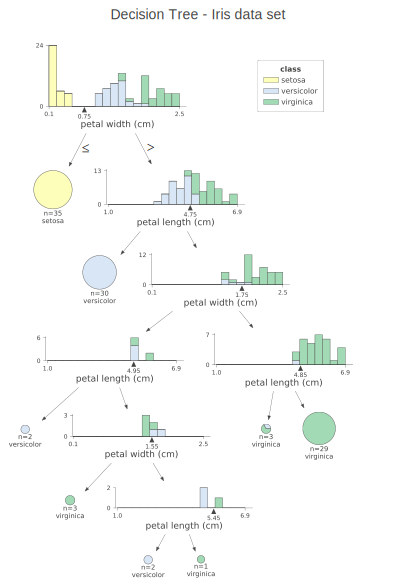

In [ ]:
viz = dtreeviz(model, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names[-2:], 
               class_names=list(iris.target_names), 
               title="Decision Tree - Iris data set")
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


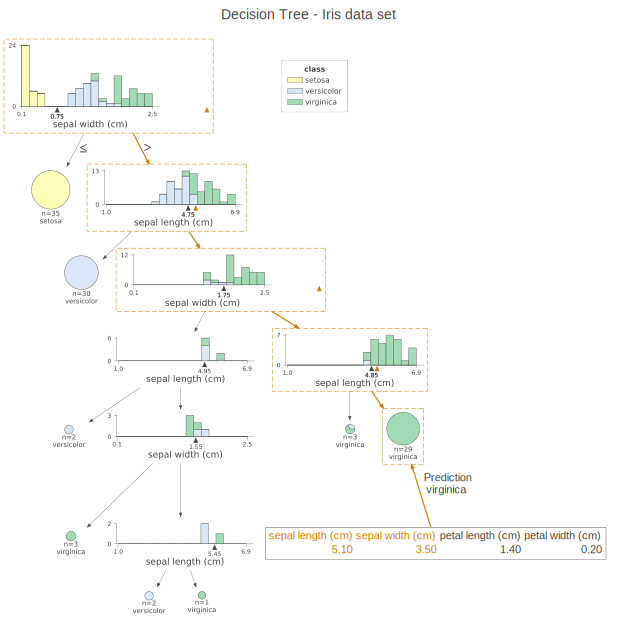

In [ ]:
viz = dtreeviz(model, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names[:], 
               class_names=list(iris.target_names),
               title="Decision Tree - Iris data set",
               #orientation="LR", 
               X=[5.1 , 	3.5 , 	1.4	, 0.2] )   # <----- # Input the parameters [Sepal length , Sepal width , Petal length , Petal width]
viz